In [1]:
import numpy as np

In [2]:
class MultipleLinearRegression:
    
    def __init__(self):
        self.coefficient = None
        self.intercept = None
        
        
    def fit(self, X, y):
        
        X = np.insert(X, 0, 1, axis = 1)
        
        slop_values = np.linalg.inv(X.T @ X) @ (X.T @ y)
        
        self.intercept = slop_values[0]
        self.coefficient = slop_values[1:]
        
    
    def predict(self, X):
        
        # y = m0 + m1x1 + m2x2 + m3x3 + m4x4 ........... + mnxn
        # y = [m1 m2 m3 m4 .......... mn] X [x1 x2 x3 x4 .............. xn] + m0
        
        return X @ self.coefficient + self.intercept
    
        

# Data Generation

In [3]:
np.random.seed(42)

no_rows = 1000000
no_features = 100

X = np.random.rand(no_rows, no_features) * 10000
y = np.random.rand(no_rows, 1) * 1000

In [4]:
X

array([[3745.40118847, 9507.1430641 , 7319.93941811, ..., 4275.41018359,
         254.19126744, 1078.91426993],
       [ 314.29185687, 6364.10411264, 3143.55981076, ..., 8971.10259953,
        8870.86424265, 7798.75545858],
       [6420.31646154,  841.39964995, 1616.28714095, ..., 2158.21027497,
        6228.90475819,  853.47464994],
       ...,
       [7454.35617898, 7928.22870997, 9713.03252787, ..., 9745.90781376,
        8102.15111089, 7204.20133291],
       [6073.1978882 , 4861.14578751, 3149.71335937, ..., 6390.14678814,
        5823.6383945 , 6640.79824981],
       [6205.90435827, 7092.62348722, 5636.29889253, ..., 3752.06579605,
        5914.03236829, 3531.58181075]])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=23)

In [7]:
lgModel = MultipleLinearRegression()

In [8]:
lgModel.fit(X_train, y_train)

In [9]:
y_pred = lgModel.predict(X_test)

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(y_test, y_pred)

-9.295240282392037e-05

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
skModel = LinearRegression()

In [14]:
skModel.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred_sk = skModel.predict(X_test)

In [16]:
r2_score(y_test, y_pred_sk)

-9.29524028245865e-05

In [17]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

def compare_models(model1, model2, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Model 1
    start_time = time.time()
    model1.fit(X_train, y_train)
    model1_train_time = time.time() - start_time

    start_time = time.time()
    model1_pred = model1.predict(X_test)
    model1_test_time = time.time() - start_time

    model1_r2 = r2_score(y_test, model1_pred)

    # Model 2
    start_time = time.time()
    model2.fit(X_train, y_train)
    model2_train_time = time.time() - start_time

    start_time = time.time()
    model2_pred = model2.predict(X_test)
    model2_test_time = time.time() - start_time

    model2_r2 = r2_score(y_test, model2_pred)

    return {
        'Num Samples': len(X),
        'Num Features': len(X[0]),
        'Model 1 Train Time (s)': round(model1_train_time, 4),
        'Model 1 Test Time (s)': round(model1_test_time, 4),
        'Model 1 R2': round(model1_r2, 4),
        'Model 2 Train Time (s)': round(model2_train_time, 4),
        'Model 2 Test Time (s)': round(model2_test_time, 4),
        'Model 2 R2': round(model2_r2, 4)
    }


In [18]:
model1 = MultipleLinearRegression()
model2 = LinearRegression()

In [19]:
input_size = 1000
no_features = 30
results = []

for i in range(10):
    temp_features = no_features
    for j in range(5):
        X = np.random.rand(input_size, temp_features) * 1e6
        y = np.random.rand(input_size, 1) * 1e6
        y = y.ravel()  
        
        metrics = compare_models(model1, model2, X, y)
        results.append(metrics)

        temp_features += 5
    input_size *= 2

In [20]:
import pandas as pd

df_results = pd.DataFrame(results)

In [21]:
df_results

,Num Samples,Num Features,Model 1 Train Time (s),Model 1 Test Time (s),Model 1 R2,Model 2 Train Time (s),Model 2 Test Time (s),Model 2 R2
0,1000,30,0.0424,0.0000,-0.0006,0.0455,0.0000,-0.0006
1,1000,35,0.0030,0.0000,-0.0290,0.0665,0.0010,-0.0290
2,1000,40,0.0030,0.0000,-0.1278,0.0435,0.0010,-0.1278
3,1000,45,0.0330,0.0000,-0.1229,0.2201,0.0010,-0.1229
4,1000,50,0.0510,0.0000,-0.0525,0.0835,0.0010,-0.0525
5,2000,30,0.0123,0.0000,-0.0188,0.1069,0.0010,-0.0188
6,2000,35,0.0196,0.0000,-0.0239,0.0654,0.0015,-0.0239
7,2000,40,0.0199,0.0005,-0.0424,0.1633,0.0013,-0.0424
8,2000,45,0.0183,0.0010,-0.0060,0.1300,0.0000,-0.0060
9,2000,50,0.0232,0.0000,-0.0431,0.2287,0.0000,-0.0431


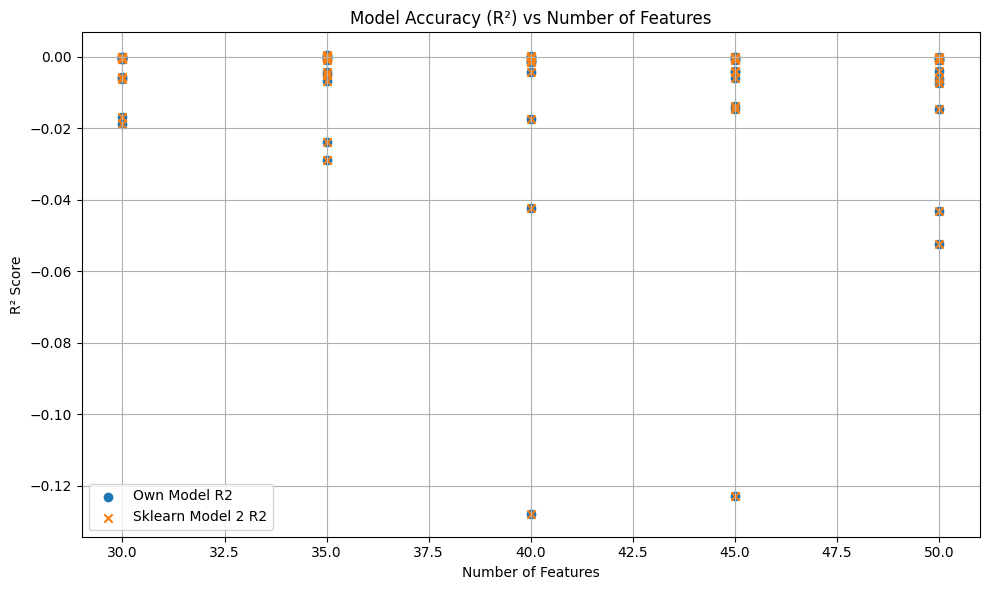

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_results['Num Features'], df_results['Model 1 R2'], label='Own Model R2', marker='o')
plt.scatter(df_results['Num Features'], df_results['Model 2 R2'], label='Sklearn Model 2 R2', marker='x')

plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.title("Model Accuracy (R²) vs Number of Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


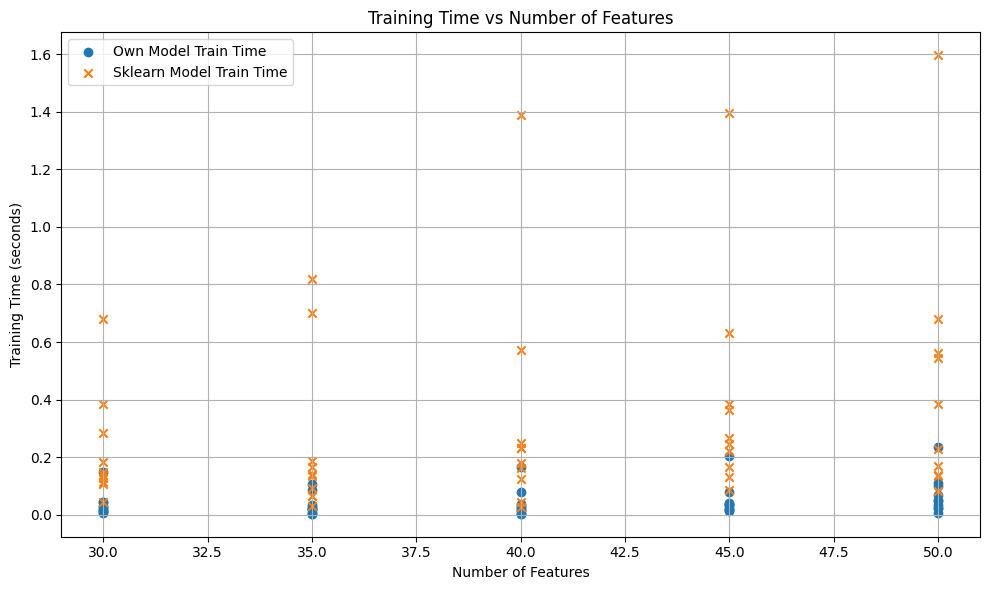

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results['Num Features'], df_results['Model 1 Train Time (s)'], label='Own Model Train Time', marker='o')
plt.scatter(df_results['Num Features'], df_results['Model 2 Train Time (s)'], label='Sklearn Model Train Time', marker='x')

plt.xlabel("Number of Features")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs Number of Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
